### BLOQUE 1

In [2]:
#1.- Mostrar el directorio de trabajo.
import os  
print("Directorio actual:", os.getcwd())  
os.chdir("/home/azureuser/cloudfiles/code/Users/belenolmosvalverde24/belendata/ejercicio_ntt_data")


Directorio actual: /mnt/batch/tasks/shared/LS_root/mounts/clusters/belen-olmos/code/Users/belenolmosvalverde24/belendata/ejercicio_ntt_data


In [3]:
#2.- Cargar librerías y paquetes
import pandas as pd
import importlib.util
import subprocess

# Verificamos si un paquete está instalado y, si no, instalarlo
def check_install(package):
    if importlib.util.find_spec(package) is None:  # Verifica si la librería está instalada
        subprocess.run(["pip", "install", package])  # Si no está, la instala
    print(f"{package} está instalado.")  # Mensaje de confirmación

# Verificamos e instalamos los paquetes si es necesario
check_install("pandas")
check_install("seaborn")
check_install("xlrd")


pandas está instalado.
seaborn está instalado.
xlrd está instalado.


In [4]:
#3.- Cargamos el archivo Wilcox1.py
import Wilcox1

In [5]:
#4.- Semilla: como algunos calculos son aleatorios, fijamos la semilla para que los resultados sean reproducibles.

import numpy as np  # Para cálculos matemáticos
import random  # Para números aleatorios

np.random.seed(42)  # Fija una semilla en NumPy
random.seed(42)  # Fija una semilla en la librería random

In [6]:
#5.- Creación de un entorno virtual en el terminal

#sh
#python -m venv venv

### BLOQUE 2

In [7]:
#6.- Cargar data_train.csv con todas las 373 columnas como strings

import pandas as pd  # Importamos pandas para manejar datos en tablas

# Cargar el CSV con todas las columnas como string
csv_path = "/home/azureuser/cloudfiles/code/Users/belenolmosvalverde24/belendata/ejercicio_ntt_data/data_train.csv"
raw_datos = pd.read_csv(csv_path, dtype=str)

# Mostrar las primeras filas
print(raw_datos.head())

  Unnamed: 0  ID var_1 var_2 var_3 var_4 var_5 var_6 var_7 var_8  ... var_362  \
0          2   3     2    34   0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
1          7  14     2    27   0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
2          8  18     2    26   0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
3         10  23     2    25   0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   
4         12  26     2    26   0.0   0.0   0.0   0.0   0.0   0.0  ...     0.0   

  var_363 var_364 var_365 var_366 var_367 var_368    var_369  \
0     0.0     0.0     0.0     0.0     0.0     0.0   49278.03   
1     0.0     0.0     0.0     0.0     0.0     0.0   94956.66   
2     0.0     0.0     0.0     0.0     0.0     0.0  251638.95   
3     0.0     0.0     0.0     0.0     0.0     0.0  356463.06   
4     0.0     0.0     0.0     0.0     0.0     0.0   75368.52   

              var_370 Target  
0  0.0128577235413985      0  
1    0.39108938631764      0  
2   0.300590388106519      0  
3   

In [8]:
#7.- Lectura de archivo .xlsx
#pd.read_excel("archivo.xlsx", dtype=str) → Lee archivos de Excel con todas las columnas en texto.

##raw_datos = pd.read_excel("data_train.xlsx", dtype=str)


In [9]:
#8.- Analisis descriptivo

print(raw_datos.info())  # Muestra detalles sobre las columnas
print(raw_datos.describe(include="all"))  # Estadísticas básicas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38067 entries, 0 to 38066
Columns: 373 entries, Unnamed: 0 to Target
dtypes: object(373)
memory usage: 108.3+ MB
None
       Unnamed: 0     ID  var_1  var_2  var_3  var_4  var_5  var_6  var_7  \
count       38067  38067  38067  38067  38067  38067  38067  38067  38067   
unique      38010  38010    160     97    389   4134   4910    147    178   
top          6496  13052      2     23    0.0    0.0    0.0    0.0    0.0   
freq            2      2  37126  10040  36228  33047  32188  37918  37888   

        var_8  ... var_362 var_363 var_364 var_365 var_366 var_367 var_368  \
count   38067  ...   38067   38067   38067   38067   38067   38067   38067   
unique     16  ...      15      26      26      46      18      63      63   
top       0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
freq    38047  ...   38053   38042   38042   38022   38050   38005   38005   

                 var_369             var_370 Target  
c

In [11]:
#9.- Identificar y tratar valores nulos

print(raw_datos.isnull().sum())  # Muestra cuántos nulos hay en cada columna

# Rellenamos los nulos con "Desconocido"
raw_datos.fillna("Desconocido", inplace=True)

Unnamed: 0    0
ID            0
var_1         0
var_2         0
var_3         0
             ..
var_367       0
var_368       0
var_369       0
var_370       0
Target        0
Length: 373, dtype: int64


In [ ]:
#10.- Recargar los datos como src_train e ID a tipo string
src_train = pd.read_csv(csv_path, dtype={"ID": "string"})

In [ ]:
#11.- Elinminamos la primera columna
src_train = src_train.iloc[:, 1:]

### BLOQUE 3

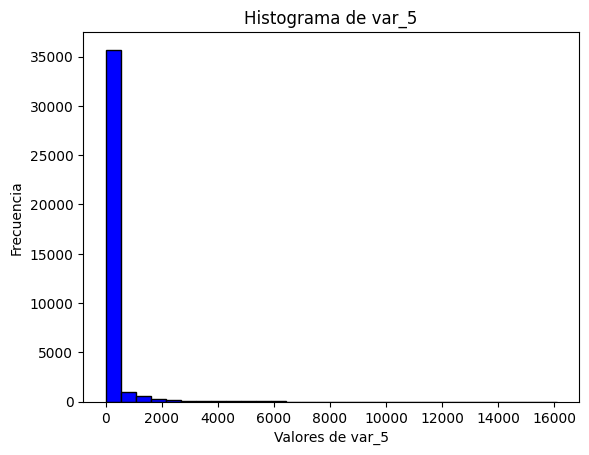

In [ ]:
#12.- Graficar el histrograma

import matplotlib.pyplot as plt  # Librería para gráficos

# Convertimos "var_5" a número para poder graficarlo
src_train["var_5"] = src_train["var_5"].astype(float)

# Creamos el histograma
plt.hist(src_train["var_5"], bins=30, color='blue', edgecolor='black')

# Etiquetas del gráfico
plt.title("Histograma de var_5")
plt.xlabel("Valores de var_5")
plt.ylabel("Frecuencia")

# Mostramos el gráfico
plt.show()


In [ ]:
#13.- Tabla de frecuencias
print(src_train["var_1"].value_counts())  # Reemplazar "var_1" por cualquier otra variable


var_1
 2         37126
 8            75
-999999       63
 9            60
 3            49
           ...  
 42            1
 58            1
 200           1
 146           1
 59            1
Name: count, Length: 160, dtype: int64


In [ ]:
#14.- Tabla de frecuencias relativas
print(src_train["Target"].value_counts(normalize=True))


Target
0    0.960254
1    0.039746
Name: proportion, dtype: float64


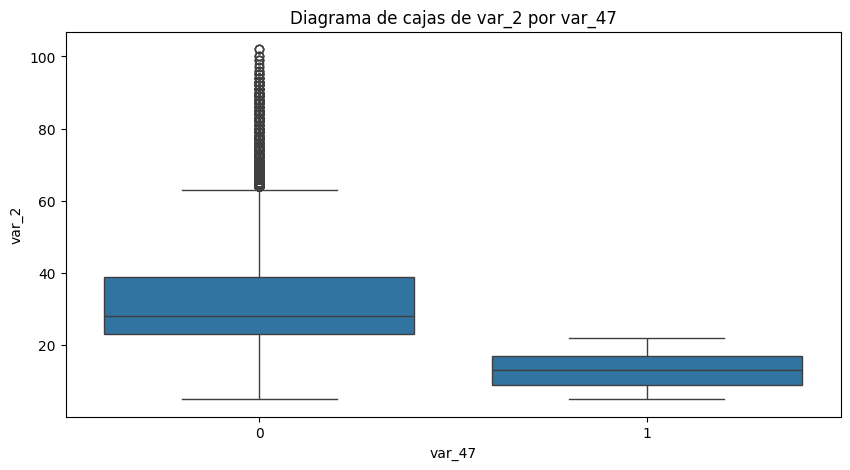

In [ ]:
#15.- Diagrama de cajas multiple de var_2 por cada nivel de var_47
import seaborn as sns  # Librería para gráficos avanzados

plt.figure(figsize=(10, 5))  # Tamaño del gráfico
sns.boxplot(x="var_47", y="var_2", data=src_train)

plt.title("Diagrama de cajas de var_2 por var_47")
plt.show()


In [ ]:
#16.- Imprimir los ouliers de var_2
Q1 = src_train["var_2"].quantile(0.25)  # Primer cuartil (25%)
Q3 = src_train["var_2"].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartil

# Definir outliers como valores que están fuera del rango normal
outliers = src_train[(src_train["var_2"] < Q1 - 1.5 * IQR) | (src_train["var_2"] > Q3 + 1.5 * IQR)]

# Mostrar los valores atípicos
print(outliers)


           ID  var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8  var_9  \
13         77      2     66    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
40        172      2     68    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
43        177      2     72    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50        193      2     77    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
55        207      2     76    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
37988  151770      2     76    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
37998  151801      2     67    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
38027   74804      2     64    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
38039   90764      2     82    3.0    0.0    0.0    0.0    0.0    0.0    0.0   
38049    4801      2     89    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  var_362  var_363  var_364  

In [ ]:
#17 y 18.- Examinar los outliers de var_370 y generar dos nuevas variables.

Q1 = src_train["var_370"].quantile(0.25)
Q3 = src_train["var_370"].quantile(0.75)
IQR = Q3 - Q1

outliers_var370 = src_train[(src_train["var_370"] < Q1 - 1.5 * IQR) | (src_train["var_370"] > Q3 + 1.5 * IQR)]
print(outliers_var370)

           ID  var_1  var_2  var_3    var_4    var_5   var_6   var_7  var_8  \
1          14      2     27    0.0     0.00     0.00    0.00    0.00    0.0   
8          60      2     40    0.0  1658.37  5722.77  247.56  835.86    0.0   
87        340      2     24    0.0     0.00     0.00    0.00    0.00    0.0   
103       417      4     45    0.0     0.00     0.00    0.00    0.00    0.0   
110       436      2     23    0.0     0.00     0.00    0.00    0.00    0.0   
...       ...    ...    ...    ...      ...      ...     ...     ...    ...   
37884  151381      2     34    0.0     0.00     0.00    0.00    0.00    0.0   
37920  151497      2     27    0.0     0.00     0.00    0.00    0.00    0.0   
37928  151531      2     23    0.0     0.00     0.00    0.00    0.00    0.0   
37967  151674      2     33    0.0   863.28  1063.95    0.00    0.00    0.0   
37999  151807      2     23    0.0   326.82   434.52    0.00    0.00    0.0   

       var_9  ...  var_362  var_363  var_364  var_3

In [ ]:
#19.- Función para normalizar cualquier serie

def normalize_series(series):
    if not isinstance(series, pd.Series):
        raise TypeError("Input debe ser una Serie de pandas")
    return (series - series.min()) / (series.max() - series.min())

# Aplicamos la función a "var_100"
src_train["var_100_norm"] = normalize_series(src_train["var_100"])


In [ ]:
#20.- Prueba de la función (test.unitario)

def test_normalize():
    test_series = pd.Series([10, 20, 30, 40, 50])
    normalized = normalize_series(test_series)
    assert normalized.min() == 0
    assert normalized.max() == 1

test_normalize()


In [ ]:
#21.- Crear las columnas var_370_log y var_370_norm

src_train["var_370_log"] = np.log1p(src_train["var_370"])
src_train["var_370_norm"] = normalize_series(src_train["var_370"])

# Guardar el dataset con variables seleccionadas
selected_vars = ["ID", "var_2", "var_276", "var_325", "var_278", "var_275", "var_280", "var_327",
                 "var_63", "var_369", "var_1", "var_279", "var_340", "var_339", "var_165", "var_177",
                 "var_172", "var_168", "var_114", "var_47", "var_105", "var_194", "Target", "var_370_log", "var_370_norm"]

vun_train = src_train[selected_vars]
vun_train.to_csv("vun_train.csv", index=False)

### BLOQUE 4

In [ ]:
#22.- Cargar el archivo vun_train.csv sobre la variable vun_train

vun_train = pd.read_csv("vun_train.csv")

In [ ]:
#23.- Separar el df en entrenamiento y validación

from sklearn.model_selection import train_test_split  # Para separar los datos
train_data, validation_data = train_test_split(vun_train, test_size=0.30, random_state=42)

In [ ]:
#24.- Realizar un modelo de regresión logística

#comprobar que nuestros datos están preparados. 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Ejemplo de variables
X_train = train_data[['var_2', 'var_276', 'var_325']]
y_train = train_data['Target']

# Crear el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtener p-valores (esto requiere statsmodels)
X_train_sm = sm.add_constant(X_train) # Agregar constante
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Imprimir los resultados
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.162698
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                26646
Model:                          Logit   Df Residuals:                    26642
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Feb 2025   Pseudo R-squ.:                 0.02859
Time:                        15:21:51   Log-Likelihood:                -4335.3
converged:                       True   LL-Null:                       -4462.8
Covariance Type:            nonrobust   LLR p-value:                 5.042e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2275      0.078    -53.937      0.000      -4.381      -4.074
var_2          0.0323      0.

In [ ]:
#25 matriz de confusión 

from sklearn.metrics import confusion_matrix, accuracy_score

# Predecir los datos de validación
X_validation = validation_data[['var_2', 'var_276', 'var_325']]
y_validation = validation_data['Target']
y_pred = model.predict(X_validation)

# Crear la matriz de confusión
cm = confusion_matrix(y_validation, y_pred)
accuracy = accuracy_score(y_validation, y_pred)

print('Matriz de confusión:\n', cm)
print('Precisión:', accuracy)


Matriz de confusión:
 [[10970     0]
 [  451     0]]
Precisión: 0.9605113387619297


#### Interpretación de resultados:
Regresión logística: Interpreta los p-valores del resumen del modelo. Si un p-valor es menor que un umbral (por ejemplo, 0.05), la variable correspondiente es estadísticamente significativa.

#### Matriz de confusión: 
Analiza la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Puedes usar métricas como la precisión, la sensibilidad, o la especificidad para evaluar el rendimiento del modelo.
